# Applying KNN to the Iris dataset

In [2]:
#Loading packages and import the Iris dataset
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
print(list(iris.target_names))
print (iris.target)

data = pd.DataFrame(iris.data)
data.columns = iris.feature_names
data['label'] = iris.target
data.head(10)

['setosa', 'versicolor', 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## Exploratory Data Analysis

In [5]:
# Check the target frequency
data['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [6]:
# View the max length and width of features
data.max()

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
label                2.0
dtype: float64

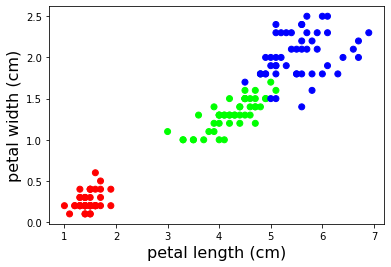

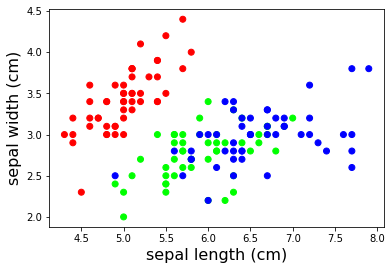

In [8]:
# Plotting PETAL LENGTH versus PETAL WIDTH and color by SPECIES

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.scatter(data['petal length (cm)'],data['petal width (cm)'],c=iris.target,cmap=cmap_bold)

plt.xlabel('petal length (cm)', fontsize=16)
plt.ylabel('petal width (cm)', fontsize=16)

plt.show()

# create a scatter plot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
plt.scatter(data['sepal length (cm)'],data['sepal width (cm)'],c=iris.target,cmap=cmap_bold)

plt.xlabel('sepal length (cm)', fontsize=16)
plt.ylabel('sepal width (cm)', fontsize=16)

plt.show()

Pedal width and length appears to be better at separating the three classes

## Applying the KNN Classifier

In [11]:
# Data Preprocessing
from sklearn.model_selection import train_test_split

# split the dataset into its attributes and labels
X = data.iloc[:, :-1].values  
y = data.iloc[:, 4].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 3)
clf = KNeighborsClassifier(n_neighbors=2)

# Fitting the model
clf.fit(X_train[:, 2:],y_train)

# Predicting the Test set results
y_pred = clf.predict(X_test[:, 2:])

In [13]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

## Evaluate the performance of the classifier using sklearn metrics

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

1.0
